# Experiment 8

## Implement a Python program to perform logistic regression on a dataset.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Load the dataset from a CSV file
df = pd.read_csv('./00 Lab_Files/Health_Dataset.csv')

# Select features (all columns except the last one) and target (the last column)
x = df.iloc[:, :2]  # Features (first two columns)
y = df.iloc[:, -1]  # Target (the last column)

# Split the dataset into training and testing sets (75% train, 25% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=40)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model using the training data
model.fit(x_train, y_train)

# Predict the target for the test data
y_pred = model.predict(x_test)

# Print the first 30 predicted vs. actual values
print("\nPredicted vs Actual Values(for 30 data points):", '\n----------------------------')
for i in range(30):
    print(f"Predicted: {y_pred[i]:.2f}, Actual: {y_test.iloc[i]:.2f}")

# Compute the confusion matrix to evaluate the accuracy of the classification
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix \n', conf_matrix)

# Calculate and print the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy of Model: {accuracy*100:.3f}%')

# Predict value for a new data point
print()
glu = int(input('Enter a Value for Glucose: '))
bp = int(input('Enter a Value for Blood Pressure: '))
y1 = model.predict([[glu, bp]])
print('Predicted Value for Given Values:', y1[0])

# Interpret and print the prediction result
pred = 'Person is Diabetic :(' if y1 == 1 else 'Person is not Diabetic'
print(pred)



Predicted vs Actual Values(for 30 data points): 
----------------------------
Predicted: 0.00, Actual: 0.00
Predicted: 1.00, Actual: 1.00
Predicted: 0.00, Actual: 0.00
Predicted: 0.00, Actual: 0.00
Predicted: 0.00, Actual: 0.00
Predicted: 0.00, Actual: 0.00
Predicted: 1.00, Actual: 1.00
Predicted: 0.00, Actual: 0.00
Predicted: 1.00, Actual: 1.00
Predicted: 1.00, Actual: 1.00
Predicted: 0.00, Actual: 0.00
Predicted: 1.00, Actual: 1.00
Predicted: 0.00, Actual: 0.00
Predicted: 1.00, Actual: 1.00
Predicted: 0.00, Actual: 0.00
Predicted: 0.00, Actual: 0.00
Predicted: 1.00, Actual: 1.00
Predicted: 1.00, Actual: 1.00
Predicted: 0.00, Actual: 0.00
Predicted: 0.00, Actual: 0.00
Predicted: 0.00, Actual: 0.00
Predicted: 1.00, Actual: 1.00
Predicted: 0.00, Actual: 0.00
Predicted: 1.00, Actual: 1.00
Predicted: 1.00, Actual: 1.00
Predicted: 1.00, Actual: 0.00
Predicted: 0.00, Actual: 0.00
Predicted: 0.00, Actual: 1.00
Predicted: 1.00, Actual: 1.00
Predicted: 1.00, Actual: 1.00
Confusion Matrix 
 [[

Enter a Value for Glucose:  80
Enter a Value for Blood Pressure:  90


Predicted Value for Given Values: 0
Person is not Diabetic


C:\Users\venki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Following are Additional Visualizations. Not Required in the Experiment

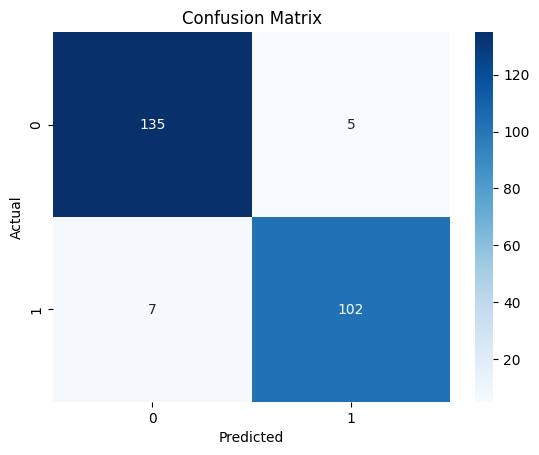

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## ROC Curve

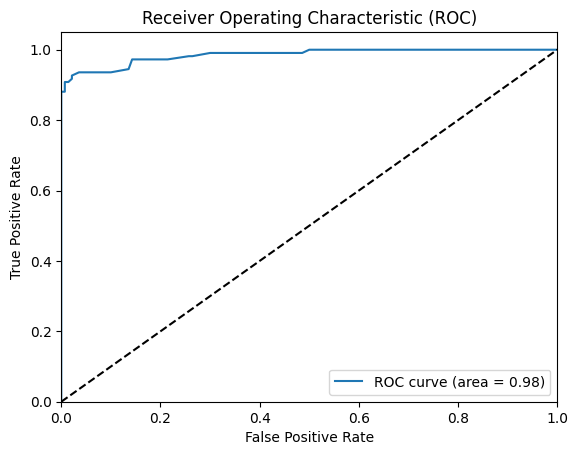

In [22]:
y_pred_proba = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()